In [1]:
from galpy.orbit import Orbit
from galpy import potential
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
from IPython.display import HTML
from galpy.potential import MWPotential2014,ChandrasekharDynamicalFrictionForce,HernquistPotential,MovingObjectPotential
from galpy.util import conversion
from streamtools.df import streamspraydf

from stream_package.stream_package import graphics
import pandas as pd

/home/student04/.local/lib/python3.10/site-packages/galpy/util/bovy_conversion.py:6: FutureWarning: galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)

/home/student04/.local/lib/python3.10/site-packages/galpy/util/bovy_coords.py:6: FutureWarning: galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old impo

In [3]:
ro = 8. #distance to Galactic centre in kpc, scales distances
vo = 220. #circular velocity at solar circle
to=conversion.time_in_Gyr(ro=ro,vo=vo)
mo=conversion.mass_in_msol(ro=ro,vo=vo)
tdisrupt=5

sixD_pace = [209.3, 26.8, 46.5, -1.176, -0.89, 197.5]

ot = Orbit(vxvv = sixD_pace, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25], radec=True)
ot.turn_physical_off()
mass = 1e6
tdisrupt = 5

ts = np.linspace(0,-(tdisrupt/3)/to,1000)
ot.integrate(ts, pot=MWPotential2014)

In [4]:
oall1, a, b, c, d, e = graphics.streamorbits(mass*5, ot, tdisrupt, pot=MWPotential2014, nstar=500)

In [5]:
oall2, a, b, c, d, e = graphics.streamorbits(mass*5, ot, tdisrupt, pot=MWPotential2014, nstar=500)

In [6]:
oall3, a, b, c, d, e = graphics.streamorbits(mass*5, ot, tdisrupt, pot=MWPotential2014, nstar=500)

In [7]:
oall4, a, b, c, d, e = graphics.streamorbits(mass*5, ot, tdisrupt, pot=MWPotential2014, nstar=500)

In [8]:
oall5, a, b, c, d, e = graphics.streamorbits(mass*5, ot, tdisrupt, pot=MWPotential2014, nstar=500)

In [9]:
group = [oall1, oall2, oall3, oall4, oall5]

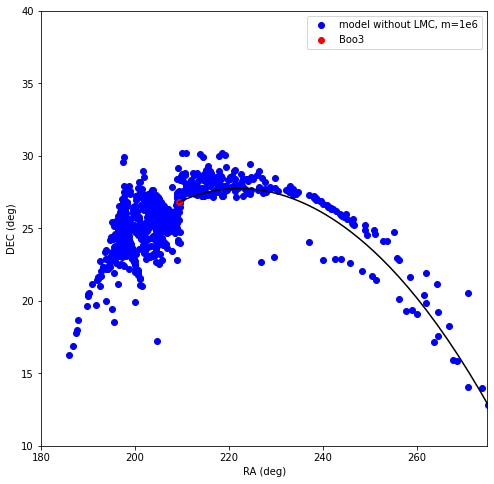

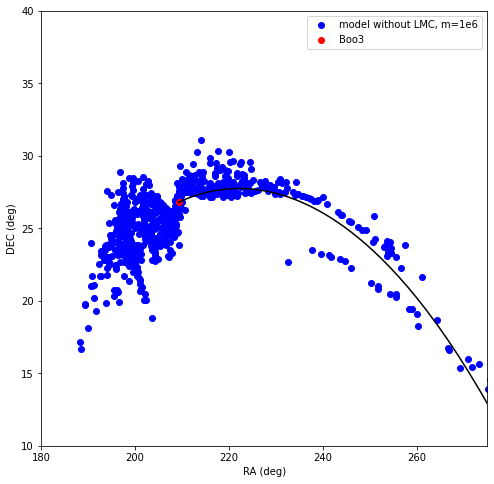

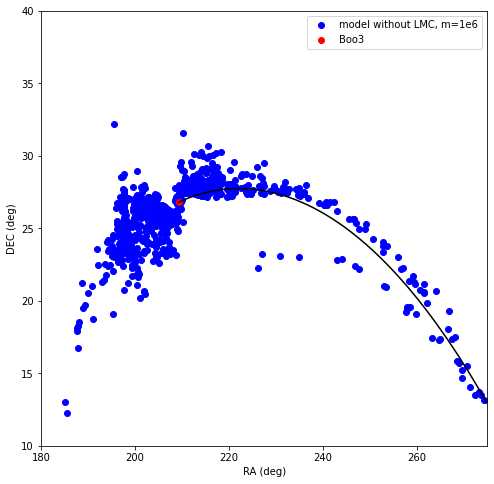

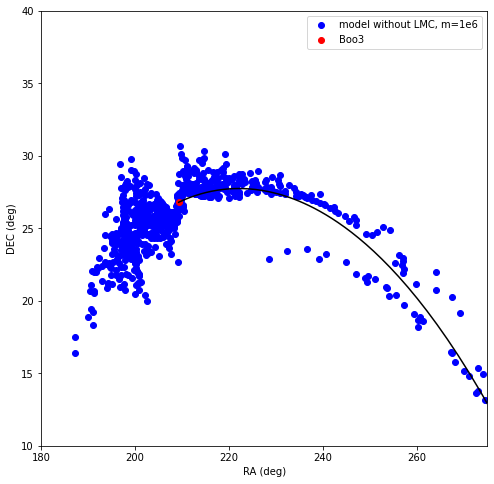

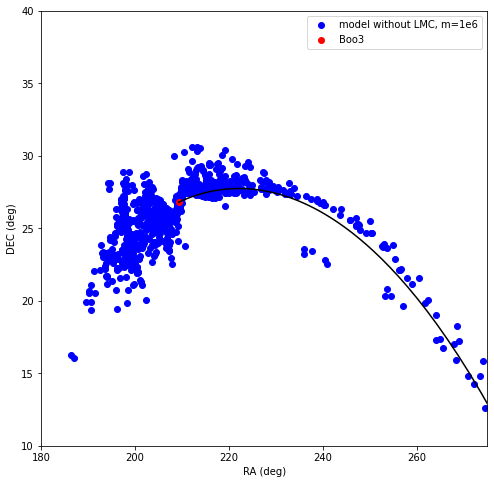

In [10]:
for oall in group:

    fig = plt.figure(figsize=(8,8))

    plt.scatter(oall.ra(), oall.dec(), label='model without LMC, m=1e6', c='blue')
    #plt.scatter(styx_ra, styx_dec, label='styx stream radec', c='g')
    #plt.scatter(styx_tra, styx_tdec, label='styx stream trace', c='lime')
    plt.scatter(ot.ra(),ot.dec(),label='Boo3', c='red')
    plt.plot(ot.ra(ts), ot.dec(ts), 'k-')
    plt.xlim(180,275)
    plt.ylim(10,40)

    plt.xlabel('RA (deg)')
    plt.ylabel('DEC (deg)')
    plt.legend()
    plt.show()